# [House prices advanced regression techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

In [1]:
import pandas

train = pandas.read_csv(".\\DONNEES\\train.csv")
test = pandas.read_csv(".\\DONNEES\\train.csv")

In [12]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,MISSING,Reg,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,MISSING,Reg,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,MISSING,IR1,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,MISSING,IR1,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,MISSING,IR1,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,12,2008,WD,Normal,250000


In [2]:
## récuperer toutes les variables quantitatives :
quanti = [ c for c in train.columns if train.dtypes[c] != "object" ]
quanti.remove("SalePrice")
quanti.remove("Id")

## pareil pour les données quali :
quali = [ c for c in train.columns if train.dtypes[c] == "object" ]

<AxesSubplot: >

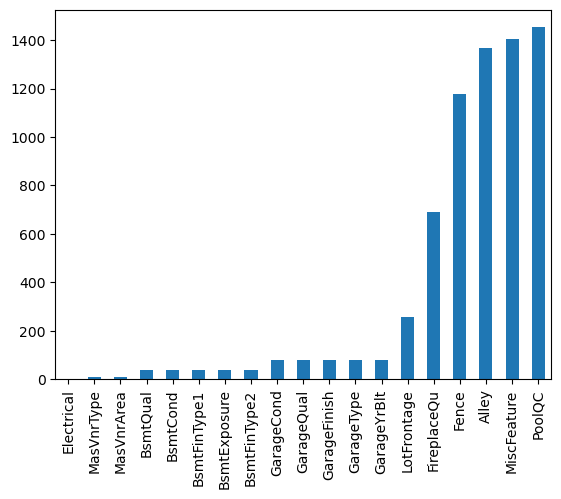

In [3]:
## Ensuite, trakcer les valeurs manquantes :
missing = train.isnull().sum()
missing = missing[ missing > 0 ]
missing.sort_values(inplace=True)

missing.plot.bar()

C:\Users\will\AppData\Local\Temp\ipykernel_36380\355530311.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(y, kde=False, fit=scipy.stats.johnsonsu)
C:\Users\will\AppData\Local\Temp\ipykernel_36380\355530311.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(y, kde=False, fit=scipy.

<AxesSubplot: title={'center': 'Log Normal'}, xlabel='SalePrice'>

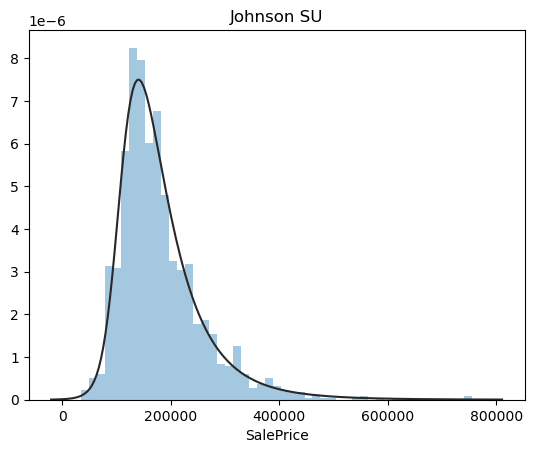

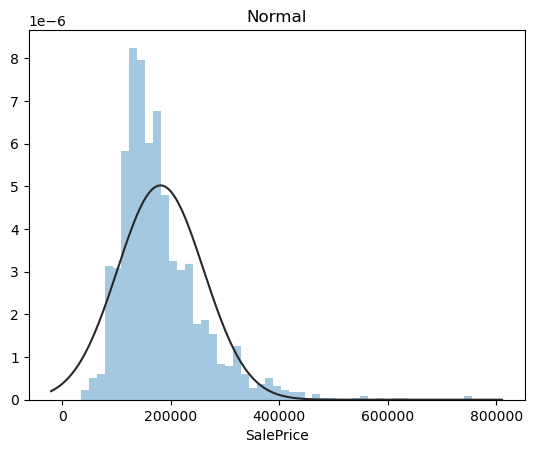

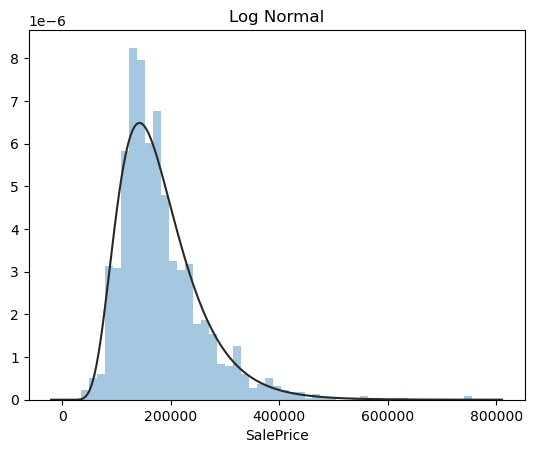

In [4]:
import scipy.stats 
import matplotlib.pyplot as plt
import seaborn

y = train["SalePrice"]
plt.figure(1) ; plt.title("Johnson SU")
seaborn.distplot(y, kde=False, fit=scipy.stats.johnsonsu)

plt.figure(2) ; plt.title("Normal")
seaborn.distplot(y, kde=False, fit=scipy.stats.norm)

plt.figure(3) ; plt.title("Log Normal")
seaborn.distplot(y, kde=False, fit=scipy.stats.lognorm)

In [ ]:
## il est évident que SalePrice ne suit pas une distribution
##+ normale. Il faut donc transformer la variable pour
##+ obtenir une distribution normale.
## Les fit qu'on a utilisé nous indique que la transformation
##+ log fera bien l'affaire. 

In [5]:
## test de normalité :
test_normality = lambda x : scipy.stats.shapiro(x.fillna(0))[1] < 0.01
normal = pandas.DataFrame(train[quanti])
normal = normal.apply(test_normality)
print( not normal.any() )

False


c:\Users\will\Anaconda3\envs\statistics\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\will\Anaconda3\envs\statistics\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


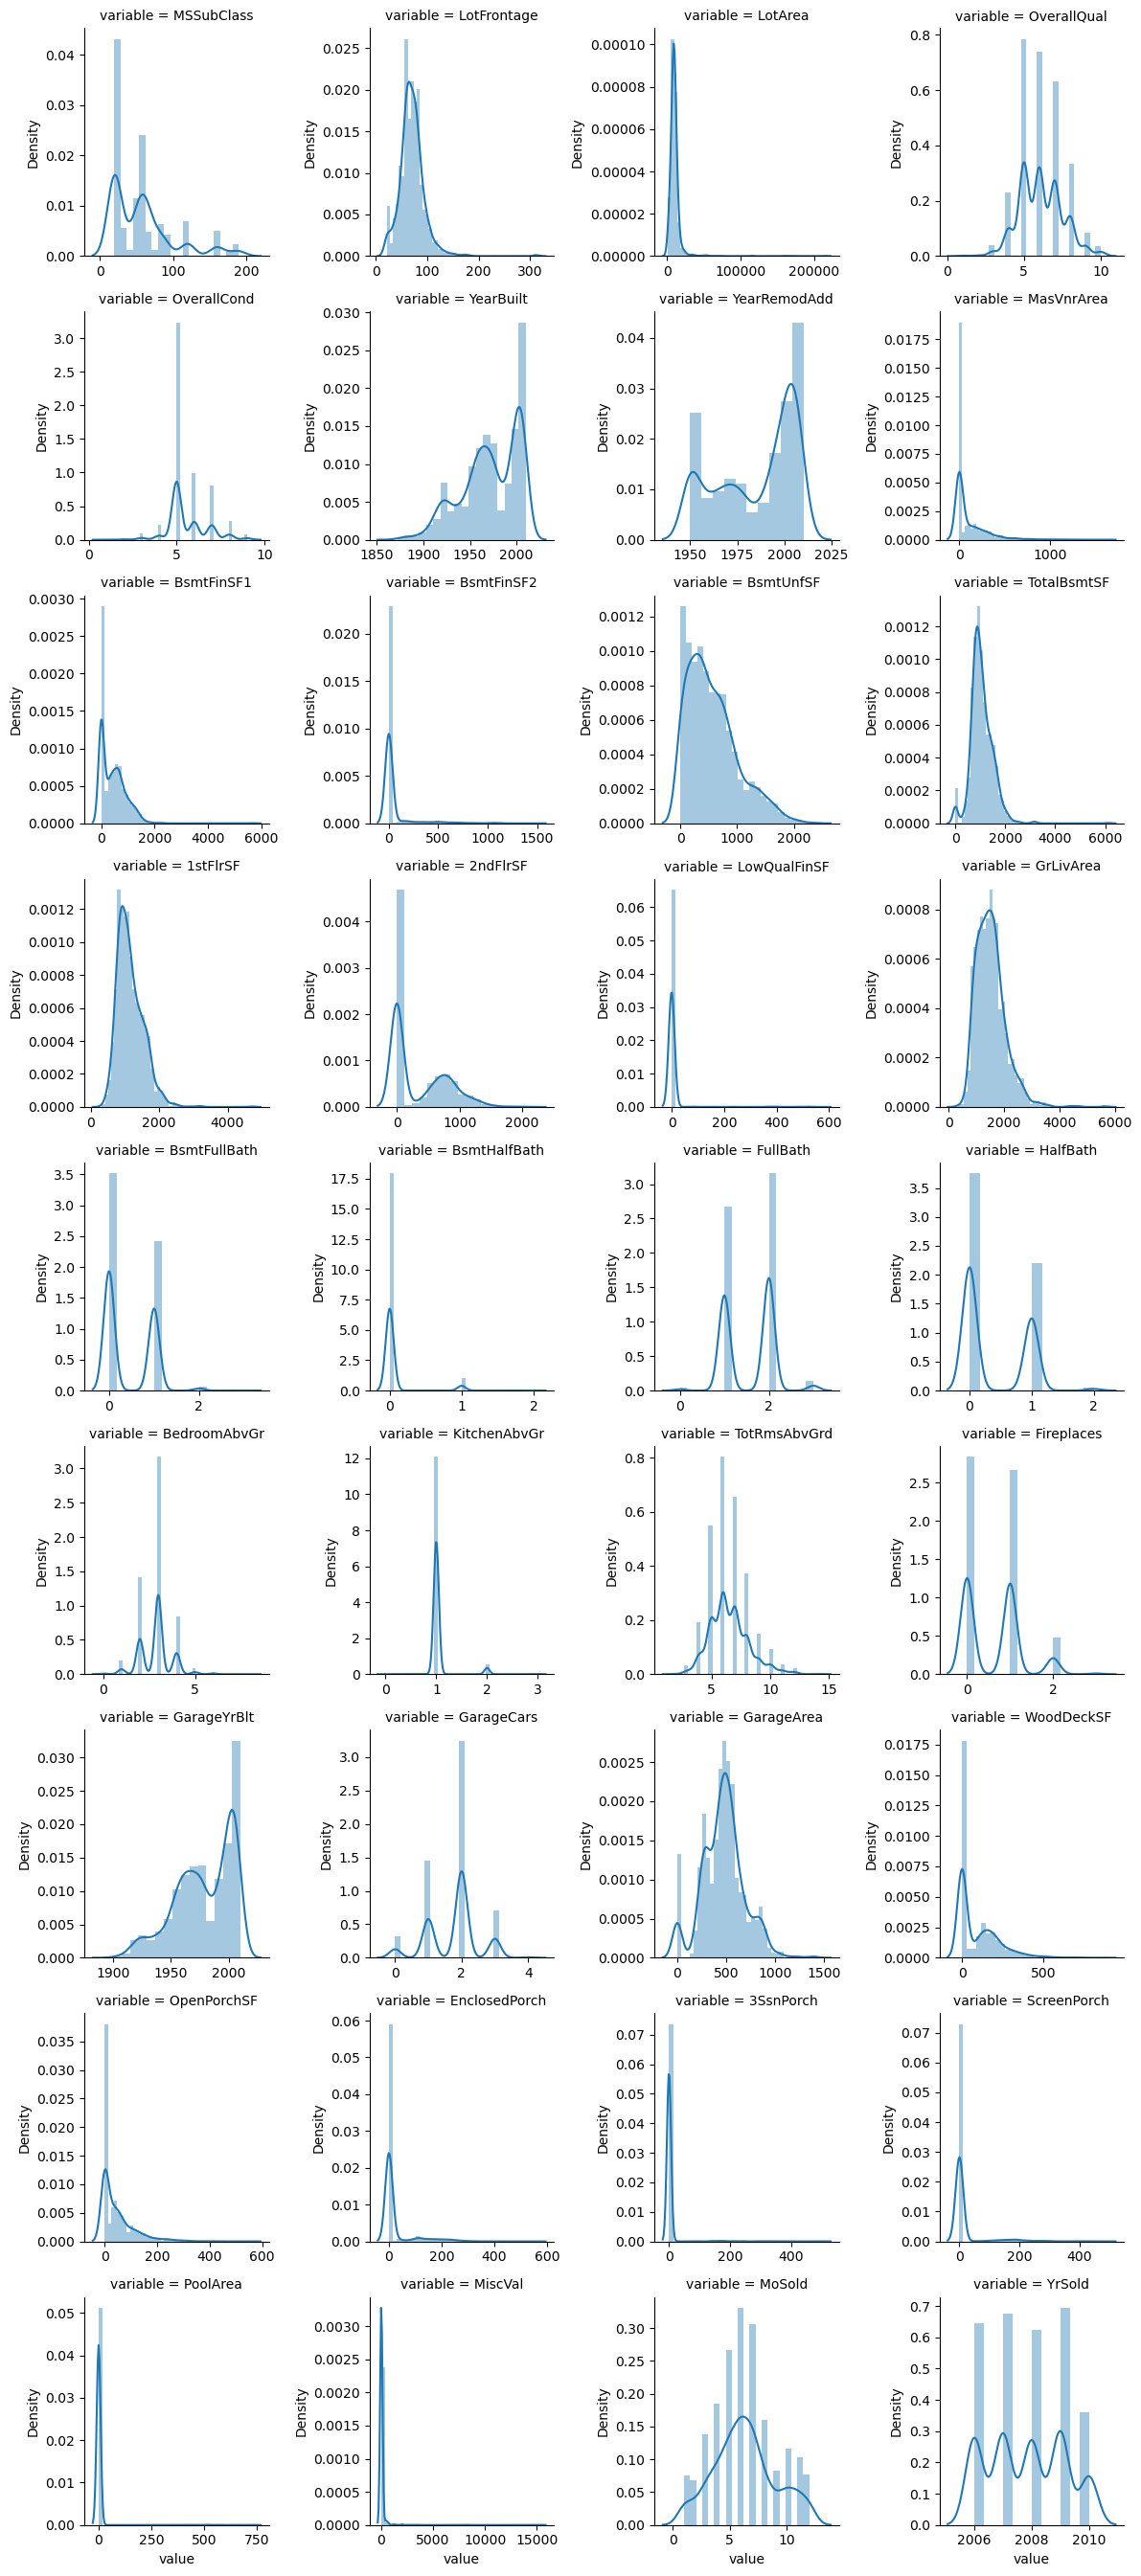

In [7]:
## A l'évidence, aucune variables quanti n'a de 
##+ distribution normale. On doit donc bien 
##+ opérer une transformation. 

f = pandas.melt(train, value_vars=quanti)
g = seaborn.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(seaborn.distplot, "value")

"Certaines variables indépendantes semblent être de bons candidats à la transformation logarithmique : TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea et autres. Lors de l'analyse de régression, la transformation lissera certaines irrégularités qui pourraient être importantes, comme le grand nombre de maisons avec 0 2ndFlrSF. Ces irrégularités sont de bons candidats pour la **construction de caractéristiques**"

## Variable catégorielle

"Avec des variables qualitatives, nous pouvons mettre en œuvre deux méthodes. La première consiste à vérifier la distribution du prix de vente en fonction des valeurs des variables et à les énumérer. La seconde consiste à créer une variable fictive pour chaque catégorie possible."

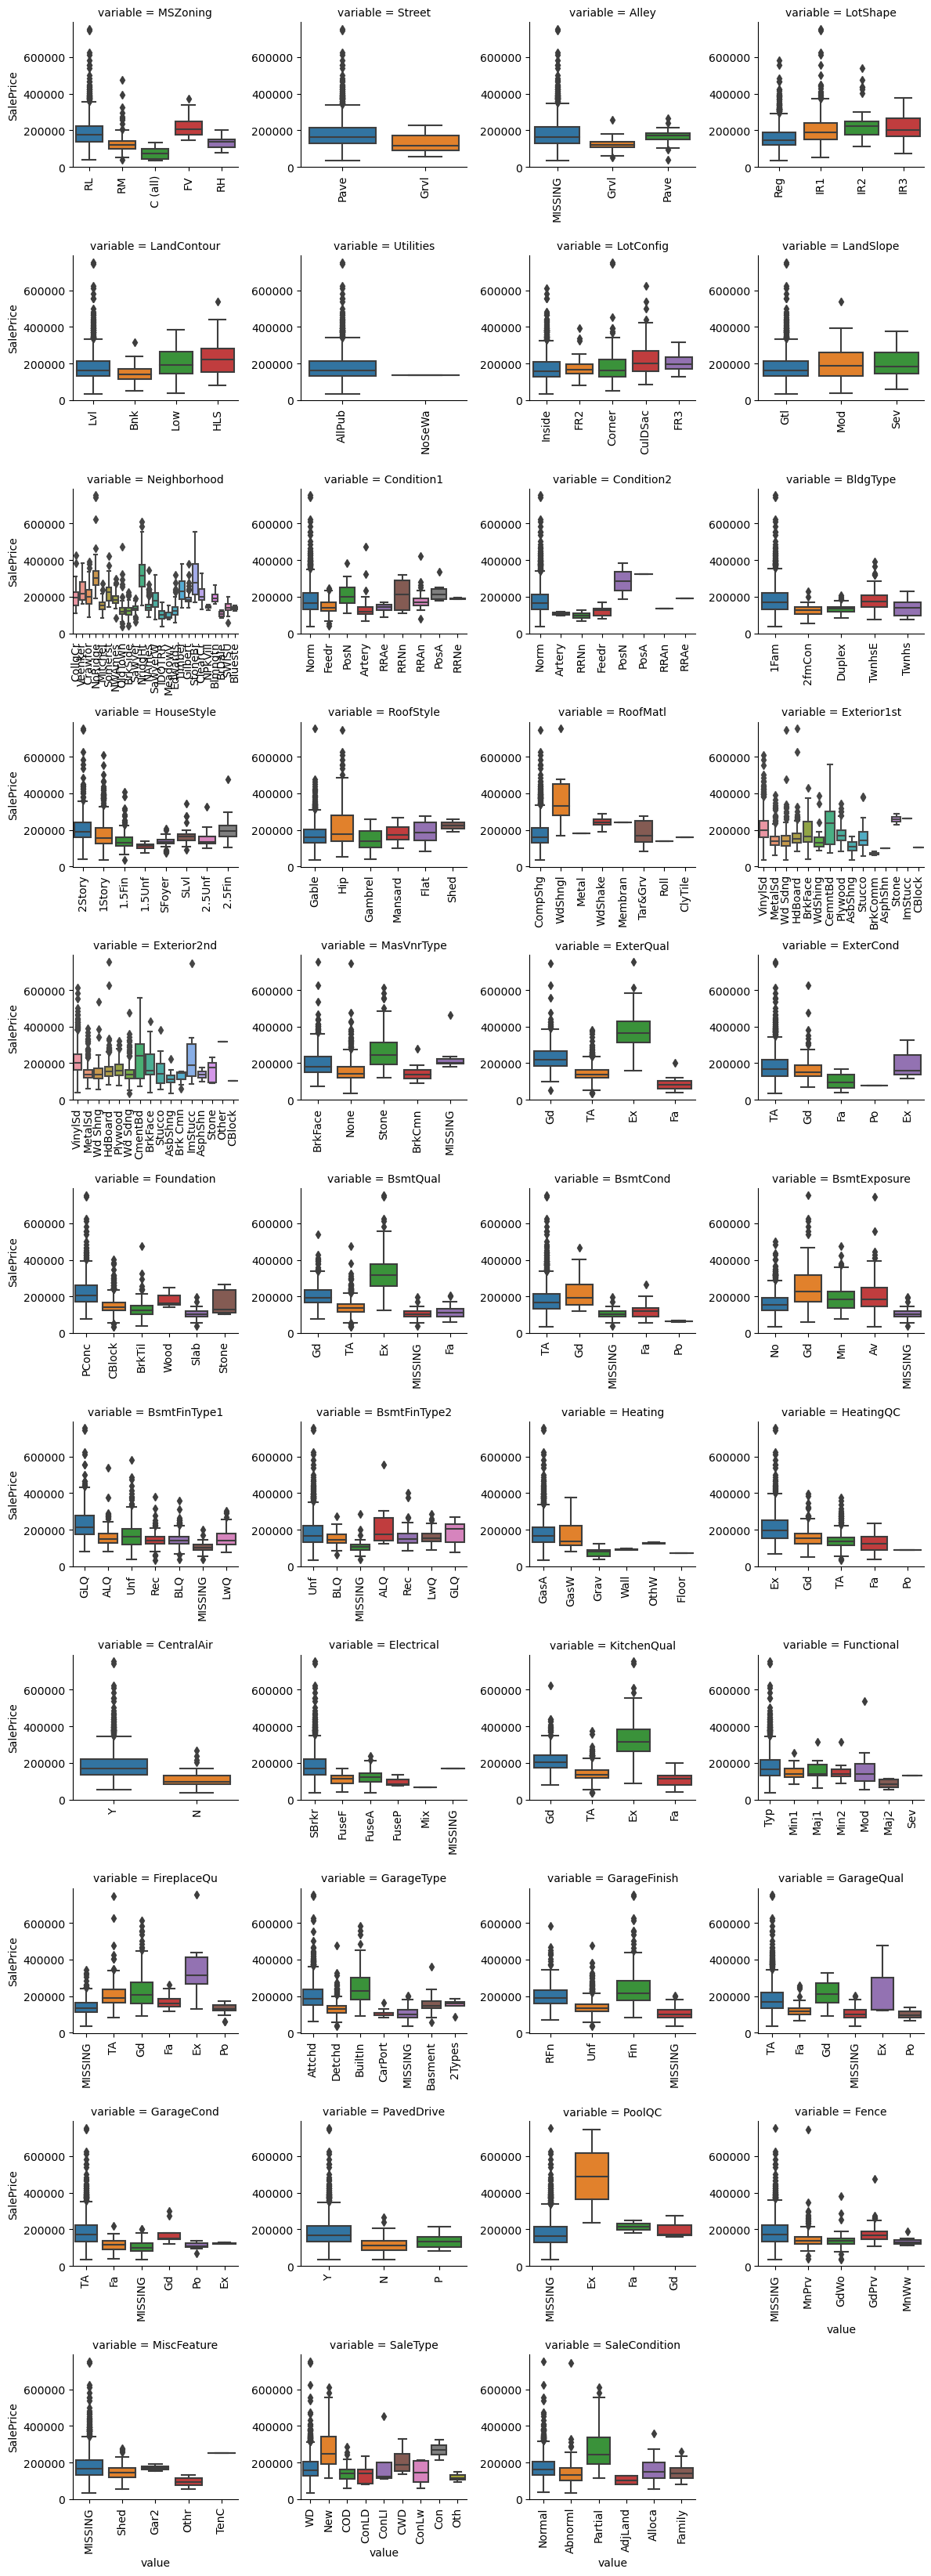

In [8]:
for c in quali :
    train[c] = train[c].astype("category")
    if train[c].isnull().any() :
        train[c] = train[c].cat.add_categories(["MISSING"])
        train[c] = train[c].fillna("MISSING")


def boxplot(x, y, **kwargs) :
    seaborn.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

f = pandas.melt(train, id_vars=["SalePrice"], value_vars=quali)
g = seaborn.FacetGrid(f, col="variable", col_wrap=4,
                      sharex=False, sharey=False)
g = g.map(boxplot, "value", "SalePrice")

Le voisinage semble avoir un grand impact sur le prix des maisons. La maison la plus cher semble être Partial SaleCondition. Aussi, avoir une piscine semble augmenter le prix de la maison substanciellement. Mais il y a aussi des différences de variabilités selon les catégories.

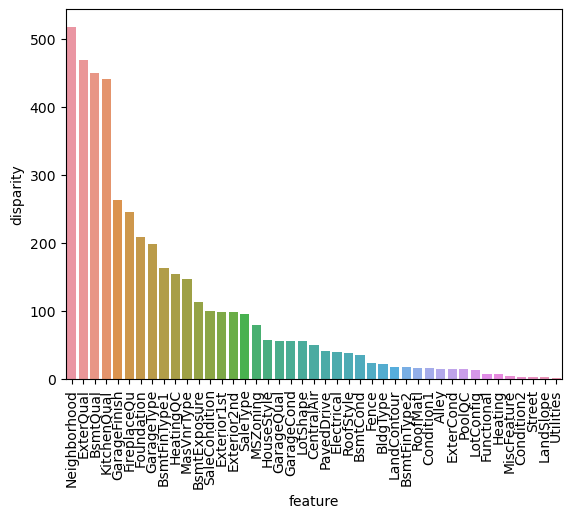

In [9]:
import numpy 

def anova(frame) :
    anv = pandas.DataFrame() 
    anv["feature"] = quali 
    pvals = list() 
    for c in quali :
        sample = list() 
        for cls in frame[c].unique() :
            s = frame[ frame[c] == cls]["SalePrice"].values 
            sample.append(s)

        pval = scipy.stats.f_oneway(*sample)[1] ## récupérer la pvalue de l'anova one way
        pvals.append(pval)

    anv["pval"] = pvals

    return anv.sort_values("pval")

a = anova(train) ## ANOVA sur train
a["disparity"] = numpy.log(1./a["pval"].values)
seaborn.barplot(data=a, x="feature", y="disparity")
x = plt.xticks(rotation=90)

In [13]:
a

,feature,pval,disparity
8,Neighborhood,1.558600e-225,517.637858
18,ExterQual,1.439551e-204,469.363028
21,BsmtQual,8.158548e-196,449.207612
30,KitchenQual,3.032213e-192,440.987045
34,GarageFinish,6.228747e-115,262.968110
32,FireplaceQu,2.971217e-107,245.287633
20,Foundation,5.791895e-91,207.778784
33,GarageType,6.117026e-87,198.513827
24,BsmtFinType1,2.386358e-71,162.613773
27,HeatingQC,2.667062e-67,153.292224


"Voici une estimation rapide de l'influence d'une variable catégorielle sur le prix de vente. Pour chaque variable, les prix de vente sont répartis en ensembles distincts en fonction des valeurs de la catégorie. On vérifie ensuite à l'aide d'un test ANOVA si les ensembles ont des distributions similaires. Si la variable a un impact mineur, les moyennes des ensembles devraient être égales. La diminution de la pval est le signe d'une diversité croissante dans les partitions."

In [14]:
def encode(frame, feature) :
    ordering = pandas.DataFrame() 
    ordering["val"] = frame[feature].unique() 
    ordering.index = ordering.val 
    ordering["spmean"] = frame[ [feature, "SalePrice"] ].groupby(feature).mean()["SalePrice"]
    ordering = ordering.sort_values("spmean")
    ordering["ordering"] = range(1, ordering.shape[0]+1)
    ordering = ordering["ordering"].to_dict()

    for cat, o in ordering.items() :
        frame.loc[frame[feature] == cat, feature+'_E'] = o

qual_encoded = list() 
for q in quali :
    encode(train, q)
    qual_encoded.append(q+"_E")

print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


## Correlation

"En général, pour réduire les confusions, seules les variables non corrélées entre elles doivent être ajoutées aux modèles de régression (qui sont corrélées avec le prix de vente)."

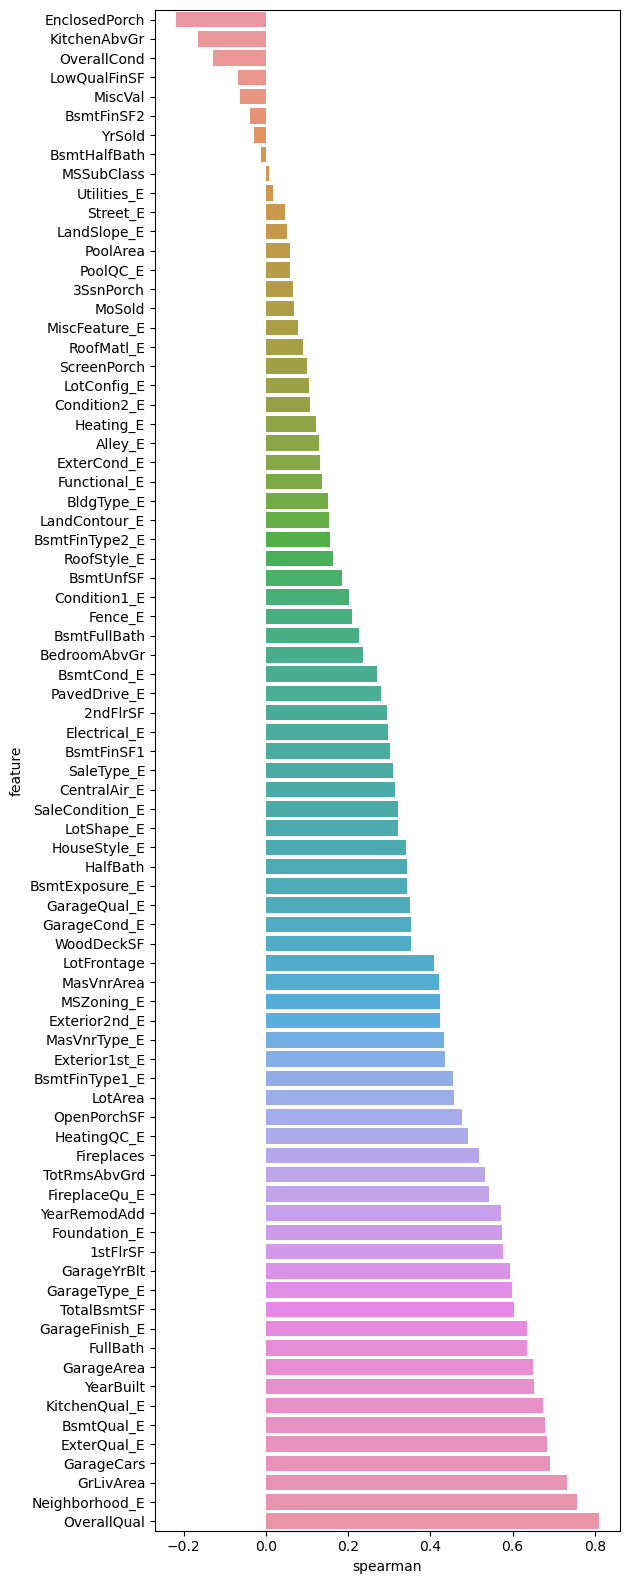

In [15]:
def spearman(frame, features) :
    spr = pandas.DataFrame() 
    spr["feature"] = features 
    spr["spearman"] = [ frame[f].corr(frame["SalePrice"], "spearman") for f in features ]
    spr = spr.sort_values("spearman")
    plt.figure(figsize=(6, 0.25 * len(features)))
    seaborn.barplot(data=spr, y="feature", x="spearman", orient="h")

features = quanti + qual_encoded 
spearman(train, features)

"La corrélation de Spearman est plus appropriée dans ce cas, car elle permet d'identifier les relations entre les variables, même lorsqu'elles ne sont pas linéaires. La qualité globale est le principal critère pour déterminer le prix d'un logement. Le quartier a une grande influence, en partie parce qu'il a une certaine valeur intrinsèque en lui-même, mais aussi parce que les maisons dans certaines régions ont tendance à partager les mêmes caractéristiques (confluence), ce qui entraîne des évaluations similaires."

<AxesSubplot: >

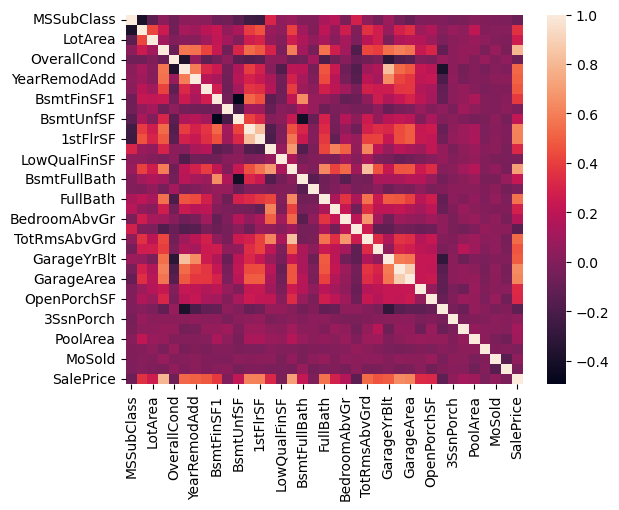

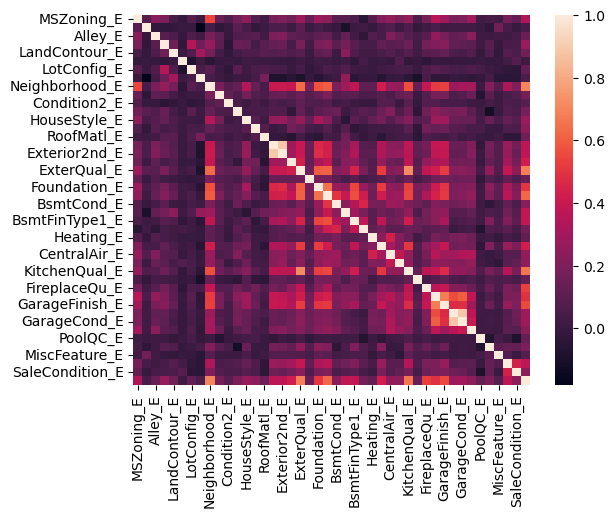

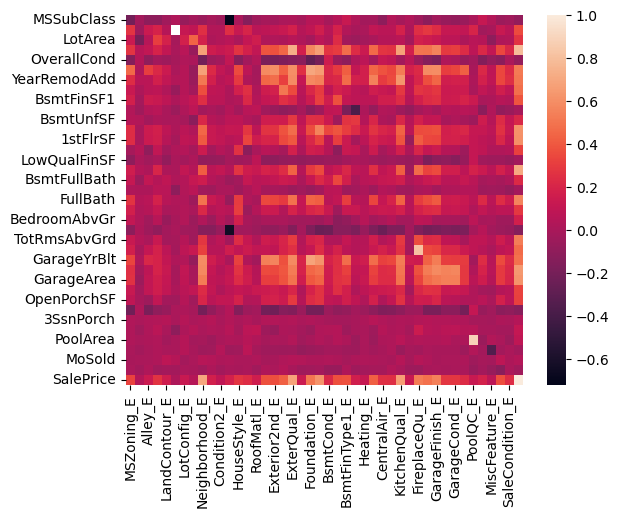

In [16]:
plt.figure(1)
corr = train[ quanti + ["SalePrice"] ].corr() 
seaborn.heatmap(corr)
plt.figure(2) 
corr = train[ qual_encoded + ["SalePrice"] ].corr() 
seaborn.heatmap(corr)
plt.figure(3) 
corr = pandas.DataFrame(numpy.zeros( [len(quanti)+1, 
                                      len(qual_encoded)+1]), index=quanti+["SalePrice"], columns=qual_encoded+["SalePrice"])
for q1 in quanti + ["SalePrice"] :
    for q2 in qual_encoded+["SalePrice"] :
        corr.loc[q1, q2] = train[q1].corr(train[q2])

seaborn.heatmap(corr)

"Il existe de nombreuses corrélations étroites entre les variables. Les garages semblent être construits la même année que les maisons, les sous-sols ont généralement la même superficie que le premier étage, ce qui est assez évident. La surface du garage est fortement corrélée avec le nombre de voitures. Le quartier est corrélé avec de nombreuses autres variables, ce qui confirme l'idée que les maisons situées dans la même région présentent les mêmes caractéristiques. Le type de logement est négativement corrélé avec la surface de la cuisine au-dessus du sol."

## Pairplot
"Il serait également utile de voir comment le prix de vente se compare à chaque variable indépendante."

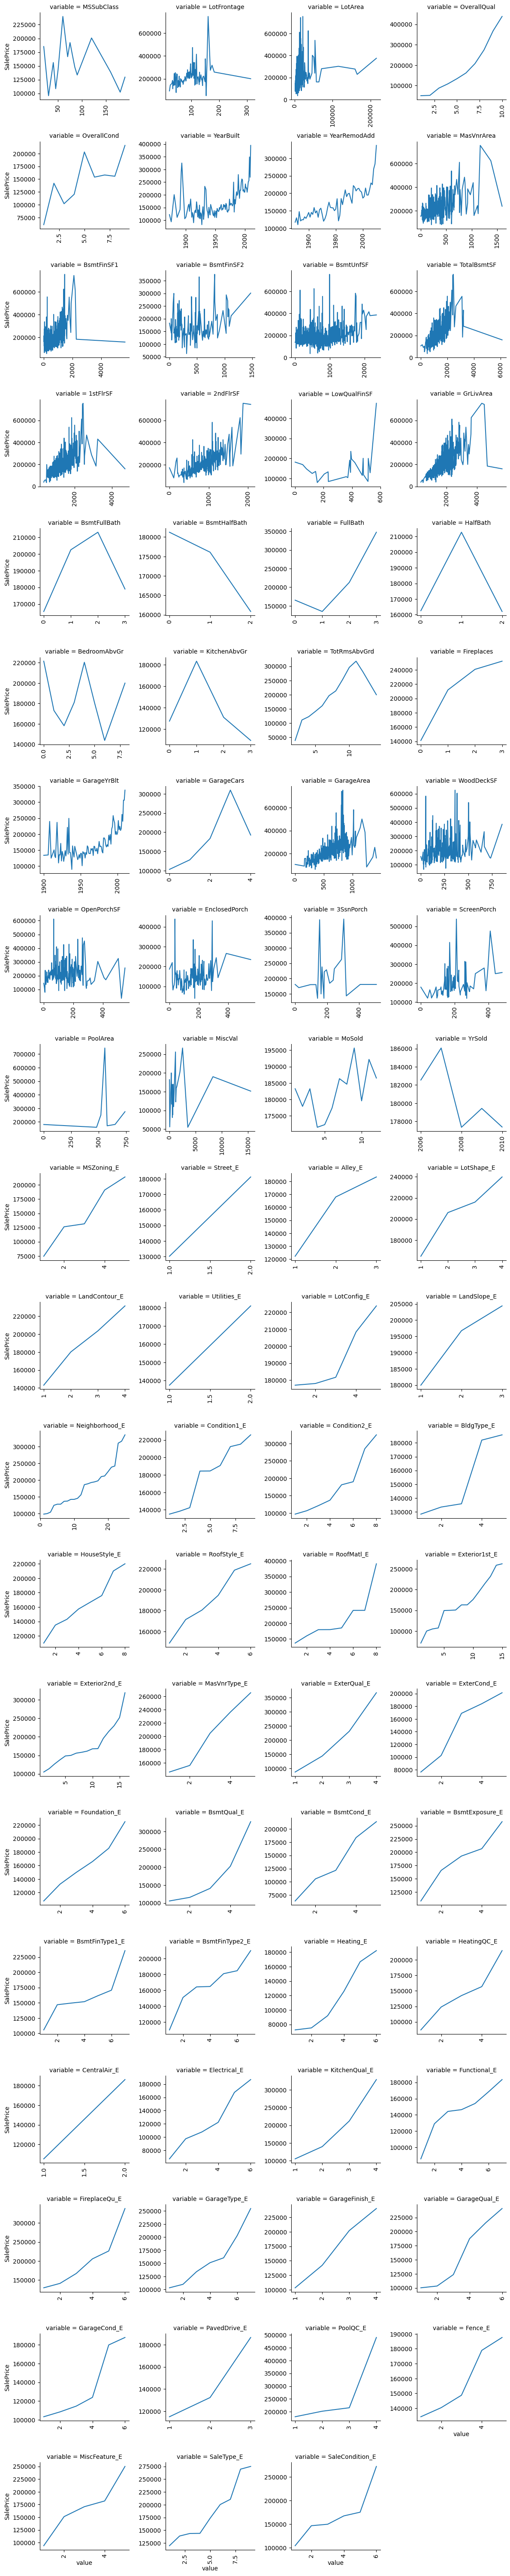

In [17]:
def pairplot(x, y, **kwargs) :
    ## récupérer l'Axes
    ax = plt.gca()
    ts = pandas.DataFrame( {"time": x, "val":y})
    ts = ts.groupby("time").mean() 
    ts.plot(ax=ax)
    plt.xticks(rotation=90)

f = pandas.melt(train, id_vars=["SalePrice"], value_vars=quanti+qual_encoded)
g = seaborn.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(pairplot, "value", "SalePrice")

"Il y a beaucoup de non-linéarités, ce qui peut expliquer pourquoi certaines variables ne sont pas sélectionnées par Lasso/Lars. Certains facteurs comme YearBuilt, 1stFlrSF, 2ndFlrSF, Neighborhood_E semblent bénéficier de l'ajout d'un terme quadratique à la régression. Mais d'un autre côté, cela provoquera probablement un surajustement."

## Price segments
"Il est possible que les corrélations changent avec la modification du prix de vente."

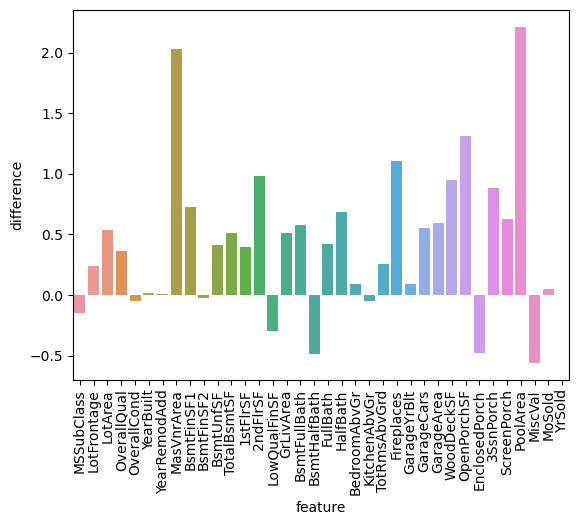

In [19]:
features = quanti 

standard = train[ train["SalePrice"] < 200000 ] ## prix std
pricey = train[ train["SalePrice"] >= 200000 ] ## cher

diff = pandas.DataFrame() 
diff["feature"] = features 
diff["difference"] = [ (pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean()) / (standard[f].fillna(0.).mean()) for f in features ]

seaborn.barplot(data=diff, x="feature", y="difference")
x=plt.xticks(rotation=90)

## Clustering

c:\Users\will\Anaconda3\envs\statistics\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\will\Anaconda3\envs\statistics\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0.7498073314407019


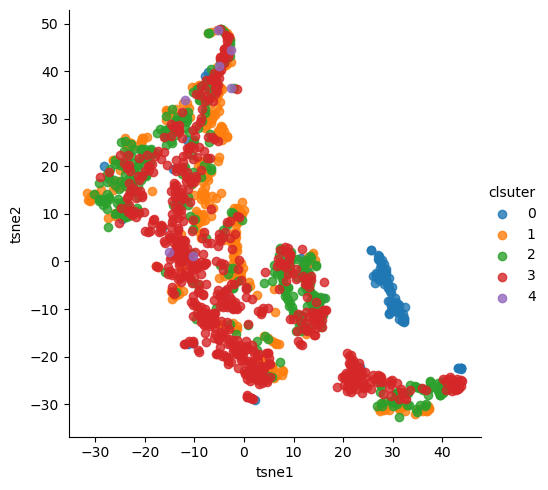

In [25]:
from sklearn.manifold import TSNE 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 

features = quanti + qual_encoded 
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = train[features].fillna(0.).values 
tsne = model.fit_transform(X)

std = StandardScaler() 
s = std.fit_transform(X) 
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s) 
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pandas.DataFrame({"tsne1":tsne[:,0], "tsne2":tsne[:,1], "clsuter":kmeans.labels_})
seaborn.lmplot(data=fr, x="tsne1", y="tsne2", hue="clsuter", fit_reg=False)
print(numpy.sum(pca.explained_variance_ratio_))

Les premier 30 composants de l'ACP expliquent 75% de la variance. Il semble qu'il y ait un certain regroupement mais ce n'est pas suffisant pour une régression segmentée. 

C:\Users\will\AppData\Local\Temp\ipykernel_36380\1159952173.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(yt)
C:\Users\will\AppData\Local\Temp\ipykernel_36380\1159952173.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(yt2)


<AxesSubplot: ylabel='Density'>

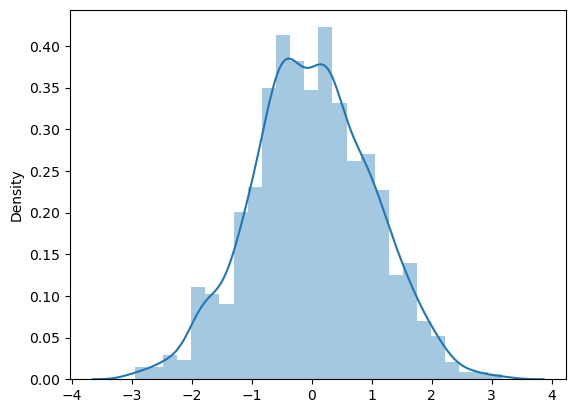

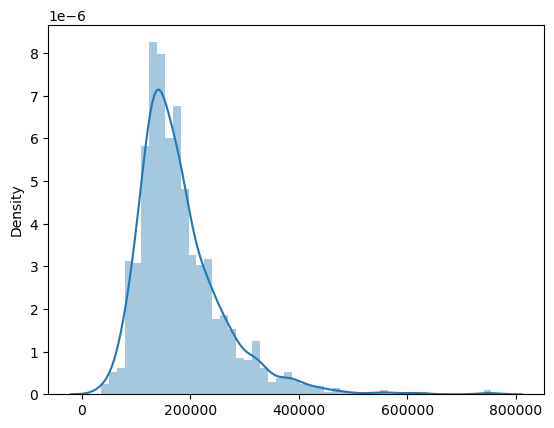

In [27]:
y = train["SalePrice"].values 
def johnson(y) :
    gamma, eta, epsilon, lbda = scipy.stats.johnsonsu.fit(y)
    yt = gamma + eta*numpy.arcsinh(( y-epsilon)/lbda)
    return yt, gamma, eta, epsilon, lbda 

def johnson_inverse(y, gamma, eta, epsilon, lbda) :
    return lbda * numpy.sinh((y-gamma)/eta) + epsilon 

yt, g, et, ep, l = johnson(y)
yt2 = johnson_inverse(yt, g, et, ep, l) 
plt.figure(1) 
seaborn.distplot(yt)
plt.figure(2)
seaborn.distplot(yt2)


## Regression

In [30]:
import numpy as np 
import sklearn.linear_model as linear_model

def error(actual, predicted):
    actual = numpy.log(actual)
    predicted = numpy.log(predicted)
    return numpy.sqrt(numpy.sum(numpy.square(actual-predicted))/len(actual))

def log_transform(feature):
    train[feature] = np.log1p(train[feature].values)

def quadratic(feature):
    train[feature+'2'] = train[feature]**2

log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')

quadratic('OverallQual')
quadratic('YearBuilt')
quadratic('YearRemodAdd')
quadratic('TotalBsmtSF')
quadratic('2ndFlrSF')
quadratic('Neighborhood_E')
quadratic('RoofMatl_E')
quadratic('GrLivArea')

qdr = ['OverallQual2', 'YearBuilt2', 'YearRemodAdd2', 'TotalBsmtSF2',
        '2ndFlrSF2', 'Neighborhood_E2', 'RoofMatl_E2', 'GrLivArea2']

train['HasBasement'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasGarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['Has2ndFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasMasVnr'] = train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
train['HasWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['IsNew'] = train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasMasVnr', 'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew']

features = quanti + qual_encoded + boolean + qdr
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = train[features].fillna(0.).values
Y = train['SalePrice'].values
lasso.fit(X, np.log(Y))

Ypred = np.exp(lasso.predict(X))
error(Y, Ypred)


c:\Users\will\Anaconda3\envs\statistics\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.1196112057700335